# Cryptocurrencies

#### Christopher Schwappach and Morley Forsyth

CBE 40455: Final Project  
December 14, 2017

## Introduction

Inspired by Jeff Kantor's Porfolio Optimization.ipynb

Used 3 major cryptocurrencies, Bitcoin, Etherium, and Iota.
Data from 6/13/17-12/14/17

Was pleased to get a minimum risk portfolio between the 3. 

### Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

# data wrangling libraries
import pandas_datareader.data as web
import pandas as pd
import datetime
%matplotlib inline



# Price Data

In [7]:
# Standard indices
Crypto = ['BTC-USD']

eth_whole=pd.read_excel('ETH-USD-6M.xls', sheet_name='ETH-USD-6M')
iot_whole=pd.read_excel('IOT-USD-6M.xls', sheet_name='IOT-USD-6M')


syms = Crypto
eth_whole.set_index('Date',inplace=True)
iot_whole.set_index('Date',inplace=True)

eth=eth_whole['ETH-USD']
iot=iot_whole['IOT-USD']



In [13]:
t2 = datetime.datetime.now()
t1 = t2 - datetime.timedelta(0)
t0 = t1 - datetime.timedelta(180)

Prices = pd.DataFrame()
PricesSim = pd.DataFrame()
for s in syms:
    print(s,end='')
    k = 1
    while k < 4:
        try:
            print(' attempt',k,end='')
            Prices[s] = web.DataReader(s,'yahoo',t0,t1)['Adj Close']
            PricesSim[s] = web.DataReader(s,'yahoo',t1,t2)['Adj Close']
            print(' ok')
            k = 4
        except:
            k += 1

BTC-USD attempt 1 ok


In [14]:
Prices=pd.concat([Prices,eth,iot],axis=1)


# Plot Price and Return Data

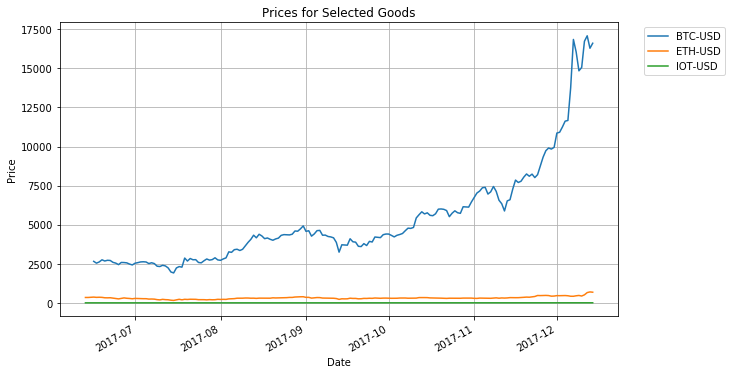

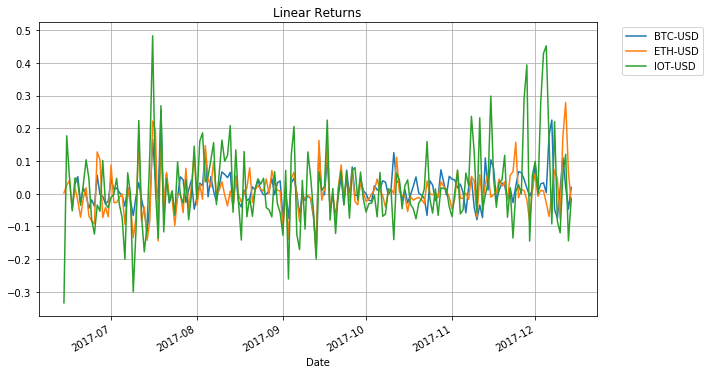

In [15]:
Prices.plot(figsize=(10,6))

plt.title('Prices for Selected Goods')
plt.ylabel('Price')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0))
plt.grid()

Returns = Prices.diff()/Prices.shift(1)

Returns.plot(figsize=(10,6))
plt.title('Linear Returns')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0))
plt.grid()

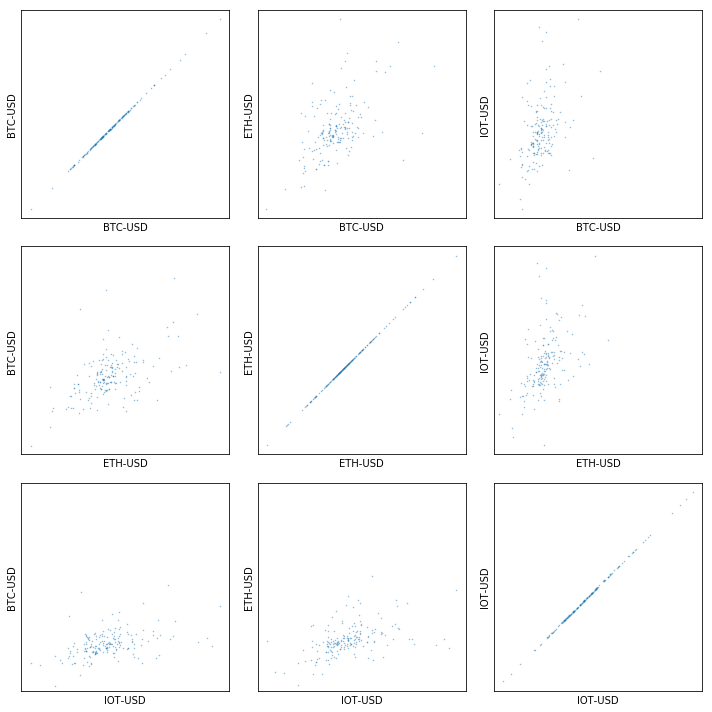

In [16]:
syms = Prices.columns
N = len(syms)
plt.figure(figsize=(10,10))
for i in range(0,N):
    for j in range(0,N):
        plt.subplot(N,N,i*N+j+1)
        gca = plt.plot(Returns[syms[i]],Returns[syms[j]],'.',ms=1,alpha=0.5)
        gca[0].axes.get_xaxis().set_ticks([])
        gca[0].axes.get_yaxis().set_ticks([])
        plt.xlabel(syms[i])
        plt.ylabel(syms[j])
        plt.axis('square')
plt.tight_layout()

# Linear and Log Returns

In [17]:
rlin = Returns.mean()
stdev = Returns.std()

rlog = np.log(Prices).diff().mean()

In [18]:
print( "Annualized Returns and Standard Deviation\n")
print( "Symbol     r_lin       r_log    r_lin-s^2/2    stdev")
for s in Returns.columns.values.tolist():
    print("{0:5s}".format(s),end='')
    print("  {0:9.5f}".format(252.0*rlin[s]),end='')
    print("   {0:9.5f}".format(252.0*rlog[s]),end='')
    print("   {0:9.5f}".format(252.0*(rlin[s] - 0.5*stdev[s]**2)),end='')
    print("   {0:9.5f}".format(np.sqrt(252.0)*stdev[s]))

Annualized Returns and Standard Deviation

Symbol     r_lin       r_log    r_lin-s^2/2    stdev
BTC-USD    2.93575     2.56674     2.56360     0.86273
ETH-USD    1.48426     0.94104     0.92327     1.05924
IOT-USD    4.60279     2.80551     2.70906     1.94614


# Covariance and Correlation Matrices

In [19]:
sigma = Returns.cov()
rho = sigma.copy()

for i in Returns.columns.values.tolist():
    for j in Returns.columns.values.tolist():
        rho[i][j] = sigma[i][j]/stdev[i]/stdev[j]
        
pd.options.display.float_format = '{:,.6f}'.format

print( "\nCovariance Matrix\n")
print( sigma)

print( "\nCorrelation Coefficients\n")
print( rho)


Covariance Matrix

         BTC-USD  ETH-USD  IOT-USD
BTC-USD 0.002954 0.001862 0.002764
ETH-USD 0.001862 0.004452 0.003815
IOT-USD 0.002764 0.003815 0.015030

Correlation Coefficients

         BTC-USD  ETH-USD  IOT-USD
BTC-USD 1.000000 0.513533 0.414897
ETH-USD 0.513533 1.000000 0.466408
IOT-USD 0.414897 0.466408 1.000000


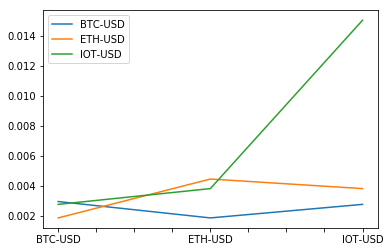

In [20]:

sigma.plot()

# Return vs Volatility

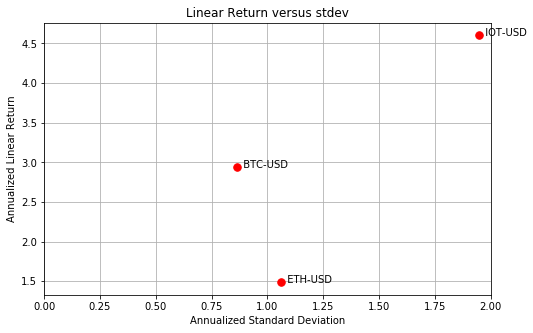

In [21]:
plt.figure(figsize=(8,5))
for s in Returns.columns.values.tolist():
    plt.plot(np.sqrt(252.0)*stdev[s],252*rlin[s],'r.',ms=15)
    plt.text(np.sqrt(252.0)*stdev[s],252*rlin[s],"  {0:5<s}".format(s))

plt.xlim(0.0,plt.xlim()[1])
plt.title('Linear Return versus stdev')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Linear Return')
plt.grid()

# Examples of Portfolios with Two Assets

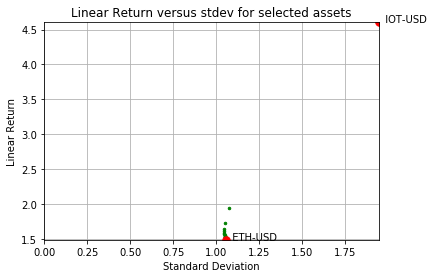

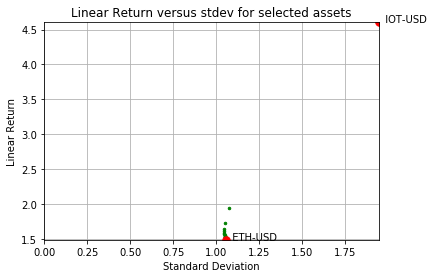

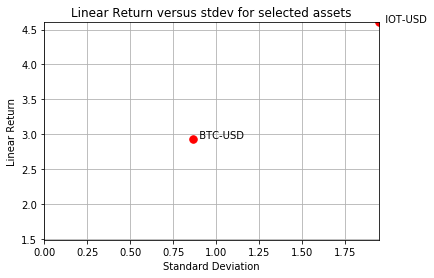

In [30]:
N_examples = 3

for i in range(0,N_examples):
    a,b = random.sample(Prices.columns.values.tolist(),2)

    plt.figure()
    for w in np.linspace(0.0,1.0,100):
        V = w*Prices[a] + (1-w)*Prices[b]
        returnsV = (V.diff()/V.shift(1))
        rV = returnsV.mean()
        sV = returnsV.std()
        plt.plot(np.sqrt(252.0)*sV,252.0*rV,'g.',ms=5)
            
    for s in (a,b):
        plt.plot(np.sqrt(252.0)*stdev[s],252*rlin[s],'r.',ms=15)
        plt.text(np.sqrt(252.0)*stdev[s],252*rlin[s],"  {0:5<s}".format(s))

    plt.xlim(0.0,np.sqrt(252.0)*stdev.max())
    plt.ylim(252.0*rlin.min(),252.0*rlin.max())

    plt.title('Linear Return versus stdev for selected assets')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Linear Return')
    plt.grid()

# Minimum Risk Porfolio

In [33]:
from pyomo.environ import *

N = len(Returns.columns.values.tolist())

m = ConcreteModel()
m.w = Var(range(0,N),domain=NonNegativeReals)

s = np.array(sigma)

m.OBJ = Objective(expr = sum(m.w[i]*s[i][j]*m.w[j] for i in range(0,N) for j in range(0,N))
                  ,sense=minimize)

m.cons = ConstraintList()
#for i in range(0,N):
#    m.cons.add(m.w[i] >=0.0)
m.cons.add(sum(m.w[i] for i in range(0,N)) == 1)

SolverFactory('ipopt').solve(m)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 1, 'Number of variables': 3, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.12.8\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.0436711311340332}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

0.7035458598947727
0.29645125730003796
2.8828051893347396e-06


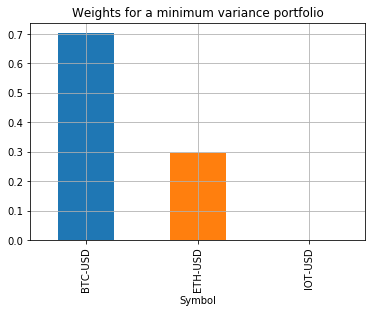

In [35]:
wval = pd.Series([m.w[i]() for i in range(0,N)],Prices.columns)
wval.plot(kind='bar')

plt.xlabel('Symbol')
plt.title('Weights for a minimum variance portfolio')
plt.grid()

for i in range(0,N):
    print(m.w[i]())


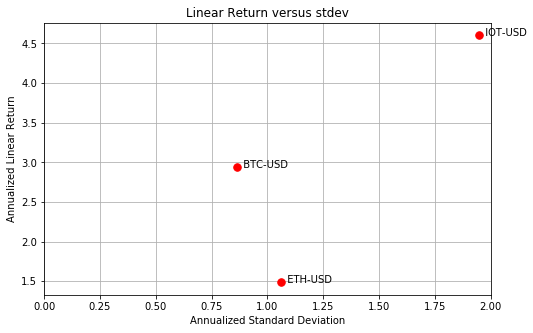

In [36]:
plt.figure(figsize=(8,5))
for s in Returns.columns.values.tolist():
    plt.plot(np.sqrt(252.0)*stdev[s],252*rlin[s],'r.',ms=15)
    plt.text(np.sqrt(252.0)*stdev[s],252*rlin[s],"  {0:5<s}".format(s))

plt.xlim(0.0,plt.xlim()[1])
plt.title('Linear Return versus stdev')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Linear Return')
plt.grid()

# Markowitz Portfolio start


Unfortunately ran out of time to work through this and modify it to pyomo. Since been deleted to clean up for final submission.